## Excecutive Summary
#### In this project, I test the hypothesis that if there is any positive relationship between the climate change and the voilent conflict, utilizing the example of three districts in Afghanistan - Kabul, Ghazni and Kunduz from year 1989 - 2019. Climate data is taken from CRU which consist of monthly time series observations of minimum temperature, maximum temperature, average temperature and precipitation from year 1989-2019. Conflict data is taken from UCDP conflict data which consists of total number of affected people due to conflicts in these three districts.
#### Based on the R-squared value, slope and p-value of the linear regression line fit between the climate change trend/seasonality and the affected people for each of the districts, I concluded that there is no conclusive positive relationship between these variables, although the Ghazni district slightly demonstrate that the climate change can increase the risk of conflict.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2, slope, p_value

#### Defined the libraries used in the project. 
#### Also defined the function 'rsquared' to extract R-squared, slope, and p-value of the fitted line

In [2]:
df = pd.read_excel('ged201.xlsx') # Conflict data read from the given excel file
df.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18,0,0,0,4,4,4,0,700,NaN
3,130359,AFG-1989-1-411-4,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-24,0,0,0,600,600,600,600,700,NaN
4,133883,AFG-1989-1-411-39,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-02-05,0,0,0,2,2,2,0,700,NaN


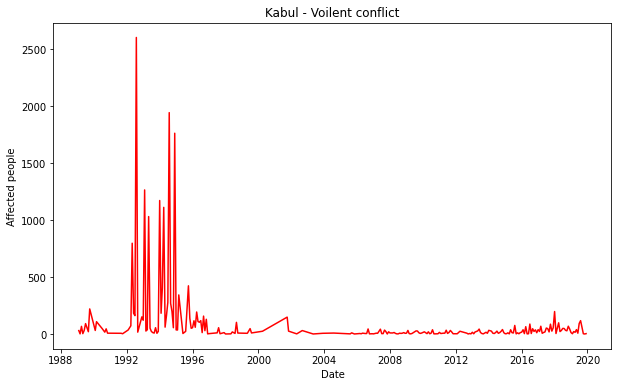

In [3]:
df['Date'] = df['date_end'].dt.strftime('%Y-%m')
    
Kabul = df[df['adm_2']=='Kabul district'].groupby(['Date']).agg({'best':['sum']})
Kabul=Kabul.reset_index()
Kabul['Date']=[datetime.strptime(x, '%Y-%m') for x in Kabul['Date']]
Kabul['index']=(Kabul['Date'].dt.year-1989)*12+Kabul['Date'].dt.month
#Kabul = Kabul[(np.abs(stats.zscore(Kabul.best)) < 3).all(axis=1)]
Kabul.head()
plt.figure(figsize=(10,6))
plt.plot(Kabul.Date, Kabul.best, color='red')
plt.title('Kabul - Voilent conflict')
plt.xlabel('Date')
plt.ylabel('Affected people')
plt.show()

#### Extracted and summed up the affected people from column 'best' (in conflict data file) monthwise for Kabul district from year 1989-2019

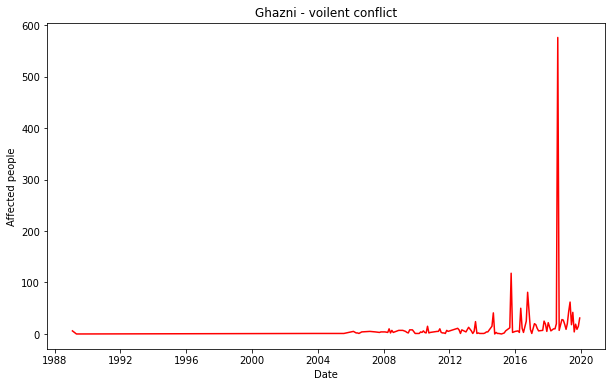

In [4]:
Ghazni = df[df['adm_2']=='Ghazni district'].groupby(['Date']).agg({'best':['sum']})
Ghazni=Ghazni.reset_index()
Ghazni['Date']=[datetime.strptime(x, '%Y-%m') for x in Ghazni['Date']]
Ghazni['index']=(Ghazni['Date'].dt.year-1989)*12+Ghazni['Date'].dt.month
#Ghazni = Ghazni[(np.abs(stats.zscore(Ghazni.best)) < 5).all(axis=1)]
Ghazni.head()
plt.figure(figsize=(10,6))
plt.plot(Ghazni.Date, Ghazni.best, color='red')
plt.title('Ghazni - voilent conflict')
plt.xlabel('Date')
plt.ylabel('Affected people')
plt.show()

#### Extracted and summed up the affected people from column 'best' (in conflict data file) monthwise for Ghazni district from year 1989-2019

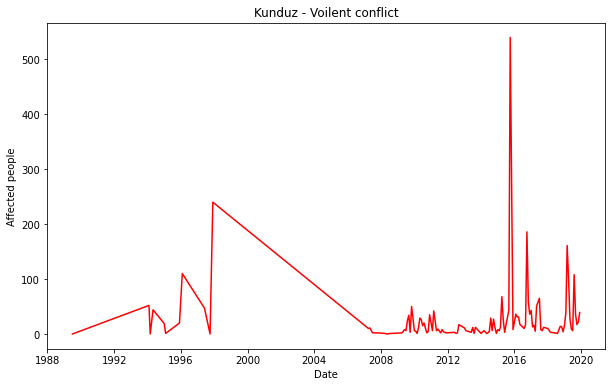

In [5]:
Kunduz = df[df['adm_2']=='Kunduz district'].groupby(['Date']).agg({'best':['sum']})
Kunduz=Kunduz.reset_index()
Kunduz['Date']=[datetime.strptime(x, '%Y-%m') for x in Kunduz['Date']]
Kunduz['index']=(Kunduz['Date'].dt.year-1989)*12+Kunduz['Date'].dt.month
#Kunduz = Kunduz[(np.abs(stats.zscore(Kunduz.best)) < 3).all(axis=1)]
Kunduz.head()
plt.figure(figsize=(10,6))
plt.plot(Kunduz.Date, Kunduz.best, color='red', label='Actual')
plt.title('Kunduz - Voilent conflict')
plt.xlabel('Date')
plt.ylabel('Affected people')
plt.show()

#### Extracted and summed up the affected people from column 'best' (in conflict data file) monthwise for Kunduz district from year 1989-2019
## Minimum Temperature Impact in Kabul, Ghazni and Kunduz districts

In [42]:
from netCDF4 import Dataset

filename1 = "cru_ts4.04.1981.1990.tmn.dat.nc"
filename2 = "cru_ts4.04.1991.2000.tmn.dat.nc"
filename3 = "cru_ts4.04.2001.2010.tmn.dat.nc"
filename4 = "cru_ts4.04.2011.2019.tmn.dat.nc"
data = Dataset(filename1)
data2 = Dataset(filename2)
data3 = Dataset(filename3)
data4 = Dataset(filename4)
print(data.variables.keys())

dict_keys(['lon', 'lat', 'time', 'tmn', 'stn'])


#### Read the minimum temperature file and stored in the data

In [43]:
lat = data.variables['lat'][:]  # extract/copy the data
lon = data.variables['lon'][:]
time = data.variables['time'][:]
tmn1 = data.variables['tmn'][:] # Time series data of minimum temperature from year 1981-1990
tmn2 = data2.variables['tmn'][:] # From year 1991-2000
tmn3 = data3.variables['tmn'][:] # From year 2001-2010
tmn4 = data4.variables['tmn'][:] # From year 2011-2019
# Latitude and longitude data of Kabul district taken from UCDP conflict data file
lat_Kabul=34.531094
long_Kabul=69.162796
lati_Kabul = np.argmin(np.abs(lat - lat_Kabul)) # Select the index at which absolute difference between the latitude and actual latitude of Kabul becomes minimum
longi_Kabul= np.argmin(np.abs(lon - long_Kabul))
print ("Kabul latitude index", lati_Kabul)
print ("Kabul longitude index", longi_Kabul)
# Latitude and longitude data of Ghazni district taken from UCDP conflict data file
lat_Ghazni=33.549999
long_Ghazni=68.416702
lati_Ghazni = np.argmin(np.abs(lat - lat_Ghazni)) 
longi_Ghazni= np.argmin(np.abs(lon - long_Ghazni))
print ("Ghazni latitude index", lati_Ghazni)
print ("Ghazni longitude index", longi_Ghazni)
# Latitude and longitude data of Kunduz district taken from UCDP conflict data file
lat_Kunduz=36.726131
long_Kunduz=68.865189
lati_Kunduz = np.argmin(np.abs(lat - lat_Kunduz)) 
longi_Kunduz= np.argmin(np.abs(lon - long_Kunduz))
print ("Kunduz latitude index", lati_Kunduz)
print ("Kunduz longitude index", longi_Kunduz)

Kabul latitude index 249
Kabul longitude index 498
Ghazni latitude index 247
Ghazni longitude index 496
Kunduz latitude index 253
Kunduz longitude index 497


#### Retrieved the latitude and longitude index of Kabul, Ghazni and Kunduz district

In [45]:
import numpy.ma as ma
# Axis 1 is monthly time series data for 10 years, Axis 2 is latitude data, Axis 3 is longitude data
Kabul_tmn=tmn1[:24,249, 498] # Retrieve the temperature data from year 1989 for Kabul district
Kabul_tmn2=tmn2[:,249, 498] # Retrieve the temperature data from year 1991-2000 for Kabul district
Kabul_tmn3=tmn3[:,249, 498] # Retrieve the temperature data from year 2001-2010 for Kabul district
Kabul_tmn4=tmn4[:,249, 498]  # Retrieve the temperature data from year 2011-2019 for Kabul district
# Append or combine all time series temperature observations from year 1989-2019 in one array "Kabul_tmn"
Kabul_tmn=ma.append(Kabul_tmn,Kabul_tmn2)
Kabul_tmn=ma.append(Kabul_tmn,Kabul_tmn3)
Kabul_tmn=ma.append(Kabul_tmn,Kabul_tmn4)
print (Kabul_tmn[:5])
print (len(Kabul_tmn))

# Same thing continues for Ghazni district
Ghazni_tmn=tmn1[:24,247, 496]
Ghazni_tmn2=tmn2[:,247, 496]
Ghazni_tmn3=tmn3[:,247, 496]
Ghazni_tmn4=tmn4[:,247, 496]
# Append or combine all time series temperature observations from year 1989-2019 in one array "Ghazni_tmn"
Ghazni_tmn=ma.append(Ghazni_tmn,Ghazni_tmn2)
Ghazni_tmn=ma.append(Ghazni_tmn,Ghazni_tmn3)
Ghazni_tmn=ma.append(Ghazni_tmn,Ghazni_tmn4)
print (Ghazni_tmn[:5])
print (len(Ghazni_tmn))

# Same thing continues for Kunduz district
Kunduz_tmn=tmn1[:24,253, 497]
Kunduz_tmn2=tmn2[:,253, 497]
Kunduz_tmn3=tmn3[:,253, 497]
Kunduz_tmn4=tmn4[:,253, 497]
# Append or combine all time series temperature observations from year 1989-2019 in one array "Kunduz_tmn"
Kunduz_tmn=ma.append(Kunduz_tmn,Kunduz_tmn2)
Kunduz_tmn=ma.append(Kunduz_tmn,Kunduz_tmn3)
Kunduz_tmn=ma.append(Kunduz_tmn,Kunduz_tmn4)
print (Kunduz_tmn[:5])
print (len(Kunduz_tmn))

[-6.6 -5.   0.6  5.8 10.2]
372
[-9.1       -7.        -2.7        2.5        6.2000003]
372
[ 0.3  2.2  7.6 12.3 17.6]
372


#### Extracted time series minimum temperature observations from year 1989-2019 for Kabul, Ghazni and Kunduz districts

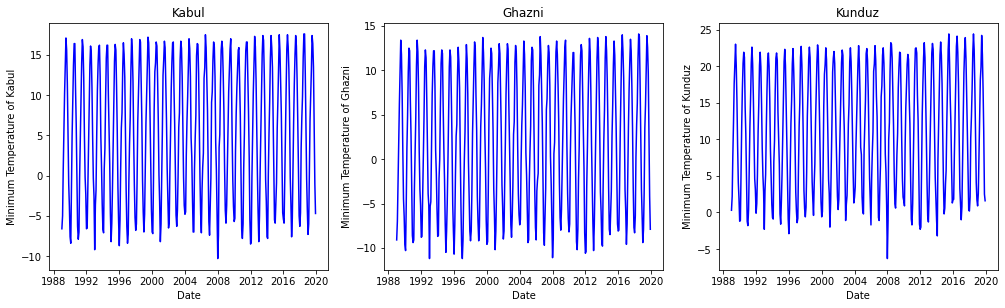

In [9]:
# Function to retreive list of months-year from year 1989-2019
def list_dates():
    Ti=[]
    s0=np.datetime64("1989-01")
    sf=np.datetime64("2019-12")
    while s0<=sf:
        Ti.append(s0)
        s0=s0+ np.timedelta64(1,'M')    
    return Ti

Dates=list_dates() # Created a list of months-year from 1989-2019

# Plot minimum temperature of Kabul, Ghazni and Kunduz district from year 1989-2019
plt.figure(figsize=(17,10))
plt.subplot(2, 3, 1)
plt.plot(Dates, Kabul_tmn, color='blue')
plt.title('Kabul')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature of Kabul')
plt.subplot(2, 3, 2)
plt.plot(Dates, Ghazni_tmn, color='blue')
plt.title('Ghazni')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature of Ghazni')
plt.subplot(2, 3, 3)
plt.plot(Dates, Kunduz_tmn, color='blue')
plt.title('Kunduz')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature of Kunduz')
plt.show()


C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


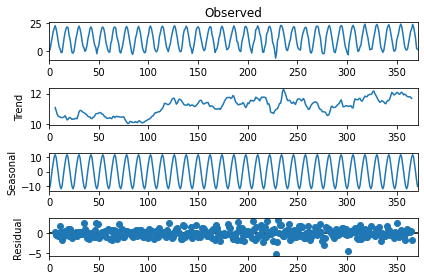

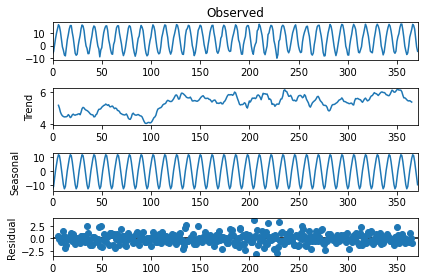

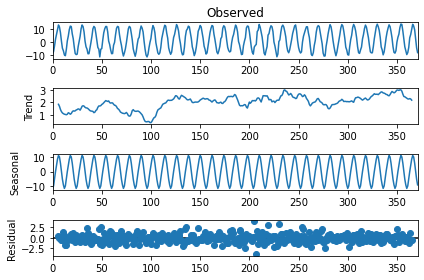

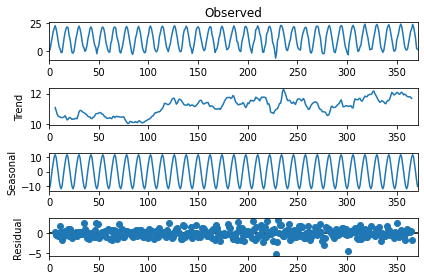

In [10]:
# Decompose the temperature time series data into seasonality and trends for each of the Kabul, Ghazni and Kunduz districts
from statsmodels.tsa.seasonal import seasonal_decompose
series1 = Kabul_tmn
series2 = Ghazni_tmn
series3 = Kunduz_tmn
result1 = seasonal_decompose(series1, model='additive', freq=12)
result2 = seasonal_decompose(series2, model='additive', freq=12)
result3 = seasonal_decompose(series3, model='additive', freq=12)
result1.plot()
result2.plot()
result3.plot()

#### Decompose the temperature time series data into seasonality and trends for each of the Kabul, Ghazni and Kunduz districts

In [11]:
Kabul_tmn=pd.DataFrame()
Kabul_tmn['trend']=result1.trend           # Retreive minimum temp trend for Kabul district from year 1989-2019
Kabul_tmn['seasonal']=result1.seasonal   # Retreive minimum temp seasonality for Kabul district
Kabul_tmn=Kabul_tmn.reset_index()
Kabul_tmn['index']=Kabul_tmn['index']+1   # Reset the index and add '1' to start the index value from 1
print(Kabul_tmn.head)

Ghazni_tmn=pd.DataFrame()
Ghazni_tmn['trend']=result2.trend        # Retreive minimum temp trend for Ghazni district from year 1989-2019
Ghazni_tmn['seasonal']=result2.seasonal  # Retreive minimum temp seasonality for Ghazni district
Ghazni_tmn=Ghazni_tmn.reset_index()
Ghazni_tmn['index']=Ghazni_tmn['index']+1
print(Ghazni_tmn.head)

Kunduz_tmn=pd.DataFrame()
Kunduz_tmn['trend']=result3.trend          # Retreive minimum temp trend for Kunduz district from year 1989-2019
Kunduz_tmn['seasonal']=result3.seasonal  # Retreive minimum temp seasonality for Kunduz district
Kunduz_tmn=Kunduz_tmn.reset_index()
Kunduz_tmn['index']=Kunduz_tmn['index']+1
print(Kunduz_tmn.head)

Kabul_tmn=Kabul_tmn.dropna()        # Drop any rows with missing or NaN values
print(Kabul_tmn.head)

Ghazni_tmn=Ghazni_tmn.dropna()
print(Ghazni_tmn.head)

Kunduz_tmn=Kunduz_tmn.dropna()
print(Kunduz_tmn.head)

<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -12.578623
1        2    NaN -11.020151
2        3    NaN  -5.114178
3        4    NaN   0.270961
4        5    NaN   4.589016
..     ...    ...        ...
367    368    NaN  10.772905
368    369    NaN   6.642211
369    370    NaN   0.971933
370    371    NaN  -5.086123
371    372    NaN  -9.725428

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -11.438727
1        2    NaN  -9.750533
2        3    NaN  -4.838032
3        4    NaN   0.126412
4        5    NaN   4.256829
..     ...    ...        ...
367    368    NaN  10.074051
368    369    NaN   5.840301
369    370    NaN   0.340579
370    371    NaN  -5.177338
371    372    NaN  -9.030949

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -11.895128
1        2    NaN  -9.845544
2        3    NaN  -4.293183
3        4    NaN   1.188623
4        5    NaN  

In [12]:
#Since not all the months (from year 1989-2019) had the conflicts, we will inner join the temperature and conflict dataframe, where new datafrome shows temperature data only for months when conflicts occured
Kabul_inner = pd.merge(Kabul, Kabul_tmn, on='index', how='inner')
for col in Kabul_inner.columns: 
    print(col)
Kabul_inner.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal'] # Rename the columns of the newly merged dataframe 

Ghazni_inner = pd.merge(Ghazni, Ghazni_tmn, on='index', how='inner')
Ghazni_inner.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal'] # Rename the columns of the newly merged dataframe 

Kunduz_inner = pd.merge(Kunduz, Kunduz_tmn, on='index', how='inner')
Kunduz_inner.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal'] # Rename the columns of the newly merged dataframe 

Kabul_inner.head()

index
('Date', '')
('best', 'sum')
('index', '')
trend
seasonal


C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,index,Date,best,index,trend,seasonal
0,7,1989-07-01,91,7,5.191667,11.457211
1,9,1989-09-01,20,9,4.762500,6.642211
2,10,1989-10-01,220,10,4.620833,0.971933
3,14,1990-02-01,31,14,4.466667,-11.020151
4,15,1990-03-01,108,15,4.475000,-5.114178


#### Newly merged dataframe consisting of affected people (due to conflict) and temperature tend/seasonality for each of the Kabul, Ghazni and Kunduz districts

Kabul (Minimum Temp Trend) (0.0684359517323498, -149.48568985115736, 5.920853691502e-05)
Kabul (Minimum Temp Seasonality) (0.00023174623805660737, 0.534878239578417, 0.8183817096641699)
Ghazni (Minimum Temp Trend) (0.04054181187097966, 36.04280499019297, 0.03665434169558808)
Ghazni (Minimum Temp Seasonality) (0.013428303160869173, 0.8921131972292082, 0.2323680063871928)
Kunduz (Minimum Temp Trend) (0.001479024481608214, 5.002130905586822, 0.6913437455560663)
Kunduz (Minimum Temp Seasonality) (0.012851584371379787, -0.8545323394148795, 0.2405126113810892)


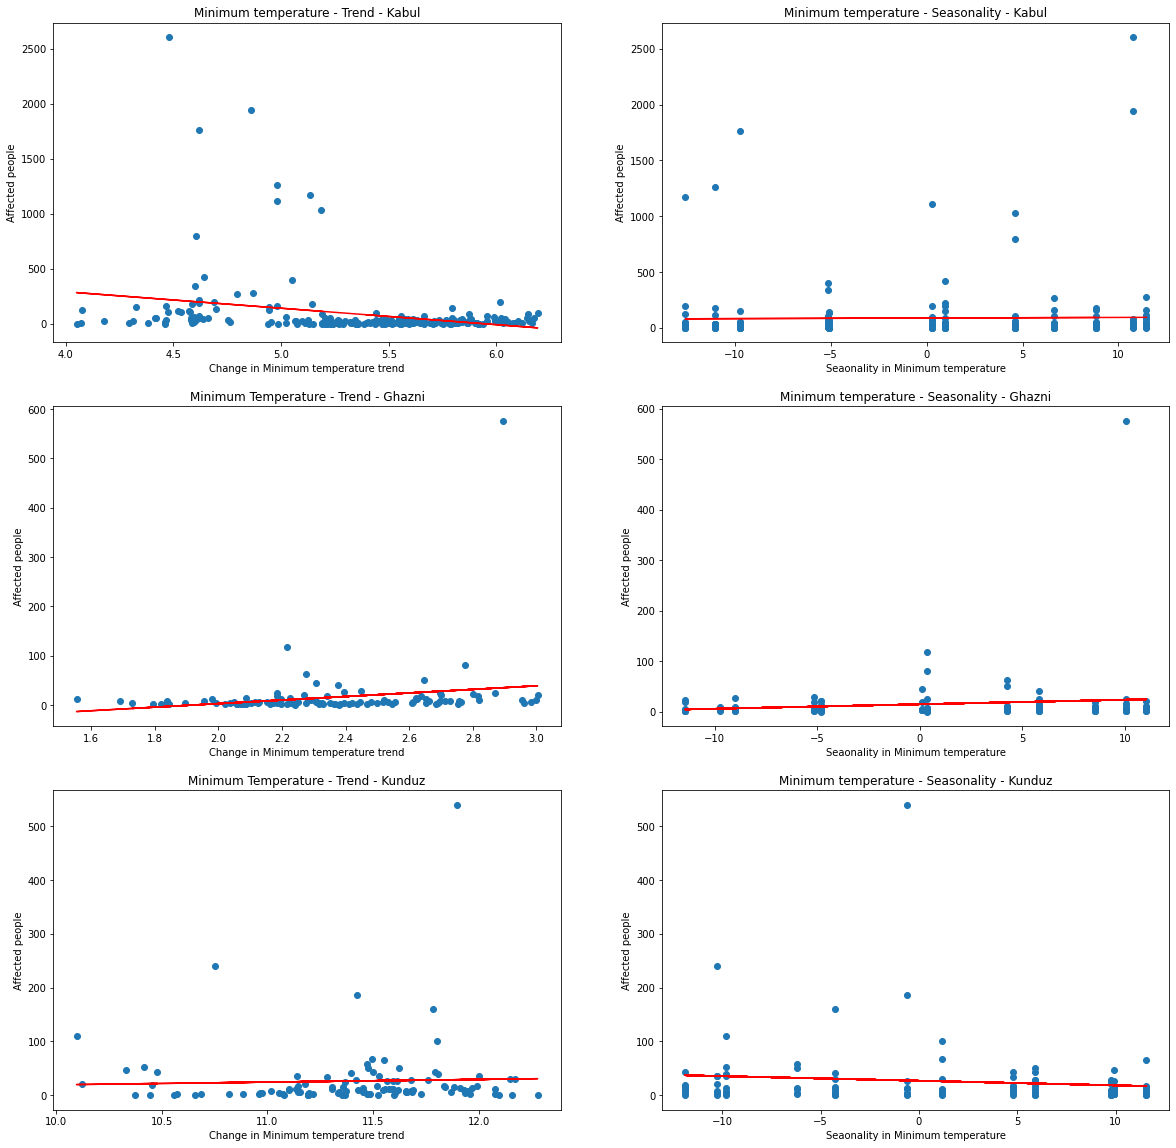

In [13]:
from sklearn.linear_model import LinearRegression
# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature trend of Kabul district
X = Kabul_inner.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.scatter(Kabul_inner.trend, Kabul_inner.best)
plt.plot(X, Y_pred, color='red')
plt.title('Minimum temperature - Trend - Kabul')
plt.xlabel('Change in Minimum temperature trend')
plt.ylabel('Affected people')
print("Kabul (Minimum Temp Trend)", rsquared(Kabul_inner.trend, Kabul_inner.best))
    
# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature seasonality of Kabul district
X = Kabul_inner.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 2)
plt.scatter(Kabul_inner.seasonal, Kabul_inner.best)
plt.plot(X, Y_pred, color='red')
plt.title('Minimum temperature - Seasonality - Kabul')
plt.xlabel('Seaonality in Minimum temperature')
plt.ylabel('Affected people')
print("Kabul (Minimum Temp Seasonality)", rsquared(Kabul_inner.seasonal, Kabul_inner.best))

# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature trend of Ghazni district
X = Ghazni_inner.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 3)
plt.scatter(Ghazni_inner.trend, Ghazni_inner.best)
plt.plot(X, Y_pred, color='red')
plt.title('Minimum Temperature - Trend - Ghazni')
plt.xlabel('Change in Minimum temperature trend')
plt.ylabel('Affected people')
print("Ghazni (Minimum Temp Trend)", rsquared(Ghazni_inner.trend, Ghazni_inner.best))

# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature seasonality of Ghazni district
X = Ghazni_inner.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 4)
plt.scatter(Ghazni_inner.seasonal, Ghazni_inner.best);
plt.plot(X, Y_pred, color='red')
plt.title('Minimum temperature - Seasonality - Ghazni')
plt.xlabel('Seaonality in Minimum temperature')
plt.ylabel('Affected people')
print("Ghazni (Minimum Temp Seasonality)", rsquared(Ghazni_inner.seasonal, Ghazni_inner.best))

# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature trend of Kunduz district
X = Kunduz_inner.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 5)
plt.scatter(Kunduz_inner.trend, Kunduz_inner.best)
plt.plot(X, Y_pred, color='red')
plt.title('Minimum Temperature - Trend - Kunduz')
plt.xlabel('Change in Minimum temperature trend')
plt.ylabel('Affected people')
print("Kunduz (Minimum Temp Trend)", rsquared(Kunduz_inner.trend, Kunduz_inner.best))


# Plot scatter plot and best fit regression line for affected people as a function of minimum temperature seasonality of Kunduz districtX = Kunduz_inner.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 6)
plt.scatter(Kunduz_inner.seasonal, Kunduz_inner.best)
plt.plot(X, Y_pred, color='red')
plt.title('Minimum temperature - Seasonality - Kunduz')
plt.xlabel('Seaonality in Minimum temperature')
plt.ylabel('Affected people')
print("Kunduz (Minimum Temp Seasonality)", rsquared(Kunduz_inner.seasonal, Kunduz_inner.best))
plt.show()

## Conclusion
#### Minimum Temperature Impact on Kabul, Ghazni and Kunduz district
Kabul (Minimum Temp Trend) (R-Sq  =0.0684359517323498,Slope = -149.48568985115736,p-value = 5.920853691502e-05)
Kabul (Minimum Temp Seasonality) (R-Sq  = 0.00023174623805660737, Slope = 0.534878239578417, p-value = 0.8183817096641699)
Ghazni (Minimum Temp Trend) (R-Sq  = 0.04054181187097966, Slope = 36.04280499019297, p-value = 0.03665434169558808)
Ghazni (Minimum Temp Seasonality) (R-Sq  = 0.013428303160869173, Slope = 0.8921131972292082, p-value = 0.2323680063871928)
Kunduz (Minimum Temp Trend) (R-Sq  = 0.001479024481608214, Slope = 5.002130905586822, p-value = 0.6913437455560663)
Kunduz (Minimum Temp Seasonality) (R-Sq  = 0.012851584371379787, Slope = -0.8545323394148795, p-value = 0.2405126113810892)
#### When the affected people (due to conflict) is plotted as a function of temperature change (trend/seasonality) and fitted with a linear regression line, all districts showed a very small R-squared value demonstrating a very weak signal in the data. Not only that, most of the districts showed the negative slope of the fitted line. So, we reject the hypothesis that climate change increases the risk of local conflict.
#### However, only Ghazni (trend in minimum temp vs. affected people) demonstrated a strong positive slope of the fitted line, since p-value=0.0367. Since p-value < 0.1, it means that the positive slope is statistically significant. This implies that although the R-squrared=0.04 (which is very small)demonstrating a weak signal, which suggest that the temperature trend change may have a bearing on increasing the conflict in Ghazni district.

## Maximum Temperature Impact in Kabul, Ghazni and Kunduz districts

In [14]:
filename1 = "cru_ts4.04.1981.1990.tmx.dat.nc"
filename2 = "cru_ts4.04.1991.2000.tmx.dat.nc"
filename3 = "cru_ts4.04.2001.2010.tmx.dat.nc"
filename4 = "cru_ts4.04.2011.2019.tmx.dat.nc"
data = Dataset(filename1)
data2 = Dataset(filename2)
data3 = Dataset(filename3)
data4 = Dataset(filename4)
print(data.variables.keys())

dict_keys(['lon', 'lat', 'time', 'tmx', 'stn'])


In [15]:
tmx1 = data.variables['tmx'][:]
tmx2 = data2.variables['tmx'][:]
tmx3 = data3.variables['tmx'][:]
tmx4 = data4.variables['tmx'][:]
import numpy.ma as ma
Kabul_tmx=tmx1[:24,249, 498]
Kabul_tmx2=tmx2[:,249, 498]
Kabul_tmx3=tmx3[:,249, 498]
Kabul_tmx4=tmx4[:,249, 498]
Kabul_tmx=ma.append(Kabul_tmx,Kabul_tmx2)
Kabul_tmx=ma.append(Kabul_tmx,Kabul_tmx3)
Kabul_tmx=ma.append(Kabul_tmx,Kabul_tmx4)
print (len(Kabul_tmx))

Ghazni_tmx=tmx1[:24,247, 496]
Ghazni_tmx2=tmx2[:,247, 496]
Ghazni_tmx3=tmx3[:,247, 496]
Ghazni_tmx4=tmx4[:,247, 496]
Ghazni_tmx=ma.append(Ghazni_tmx,Ghazni_tmx2)
Ghazni_tmx=ma.append(Ghazni_tmx,Ghazni_tmx3)
Ghazni_tmx=ma.append(Ghazni_tmx,Ghazni_tmx4)
print (len(Ghazni_tmx))

Kunduz_tmx=tmx1[:24,253, 497]
Kunduz_tmx2=tmx2[:,253, 497]
Kunduz_tmx3=tmx3[:,253, 497]
Kunduz_tmx4=tmx4[:,253, 497]
Kunduz_tmx=ma.append(Kunduz_tmx,Kunduz_tmx2)
Kunduz_tmx=ma.append(Kunduz_tmx,Kunduz_tmx3)
Kunduz_tmx=ma.append(Kunduz_tmx,Kunduz_tmx4)
print (len(Kunduz_tmx))

372
372
372


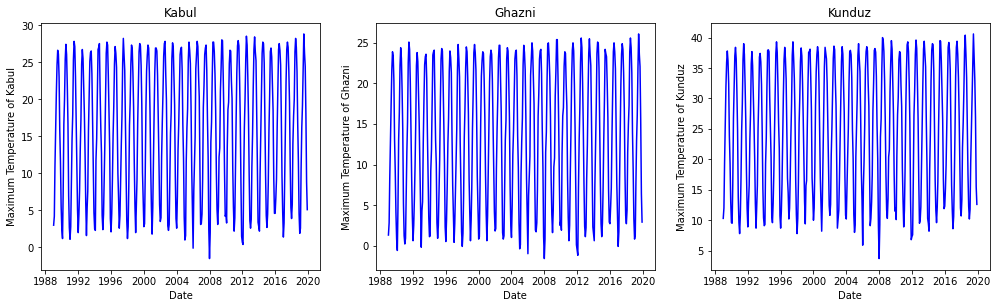

In [16]:
plt.figure(figsize=(17,10))
plt.subplot(2, 3, 1)
plt.plot(Dates, Kabul_tmx, color='blue')
plt.title('Kabul')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature of Kabul')
plt.subplot(2, 3, 2)
plt.plot(Dates, Ghazni_tmx, color='blue')
plt.title('Ghazni')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature of Ghazni')
plt.subplot(2, 3, 3)
plt.plot(Dates, Kunduz_tmx, color='blue')
plt.title('Kunduz')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature of Kunduz')
plt.show()

C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


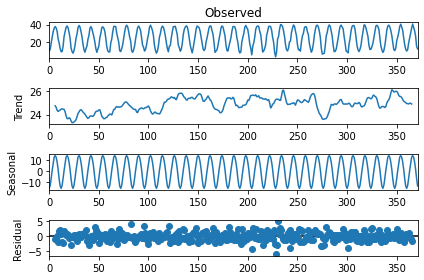

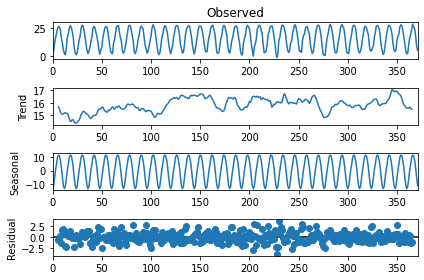

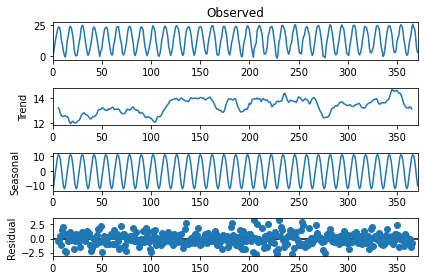

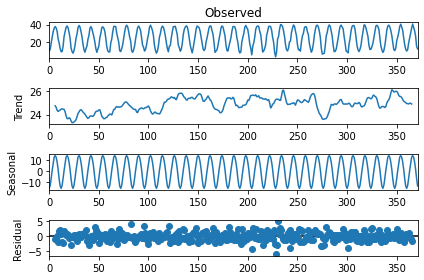

In [17]:
series1 = Kabul_tmx
series2 = Ghazni_tmx
series3 = Kunduz_tmx
result1 = seasonal_decompose(series1, model='additive', freq=12)
result2 = seasonal_decompose(series2, model='additive', freq=12)
result3 = seasonal_decompose(series3, model='additive', freq=12)
result1.plot()
result2.plot()
result3.plot()

In [18]:
Kabul_tmx=pd.DataFrame()
Kabul_tmx['trend']=result1.trend
Kabul_tmx['seasonal']=result1.seasonal
Kabul_tmx=Kabul_tmx.reset_index()
Kabul_tmx['index']=Kabul_tmx['index']+1
print(Kabul_tmx.head)

Ghazni_tmx=pd.DataFrame()
Ghazni_tmx['trend']=result2.trend
Ghazni_tmx['seasonal']=result2.seasonal
Ghazni_tmx=Ghazni_tmx.reset_index()
Ghazni_tmx['index']=Ghazni_tmx['index']+1
print(Ghazni_tmx.head)

Kunduz_tmx=pd.DataFrame()
Kunduz_tmx['trend']=result3.trend
Kunduz_tmx['seasonal']=result3.seasonal
Kunduz_tmx=Kunduz_tmx.reset_index()
Kunduz_tmx['index']=Kunduz_tmx['index']+1
print(Kunduz_tmx.head)

Kabul_tmx=Kabul_tmx.dropna()
print(Kabul_tmx.head)

Ghazni_tmx=Ghazni_tmx.dropna()
print(Ghazni_tmx.head)

Kunduz_tmx=Kunduz_tmx.dropna()
print(Kunduz_tmx.head)

<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -13.614549
1        2    NaN -11.857743
2        3    NaN  -5.573160
3        4    NaN   0.271840
4        5    NaN   4.819340
..     ...    ...        ...
367    368    NaN  10.986840
368    369    NaN   7.592951
369    370    NaN   2.200174
370    371    NaN  -5.127604
371    372    NaN -11.311771

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -12.583970
1        2    NaN -11.027303
2        3    NaN  -5.486609
3        4    NaN  -0.242442
4        5    NaN   4.391169
..     ...    ...        ...
367    368    NaN  10.527558
368    369    NaN   7.270752
369    370    NaN   1.742280
370    371    NaN  -4.968831
371    372    NaN -10.387303

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -15.626273
1        2    NaN -12.974468
2        3    NaN  -6.582940
3        4    NaN   0.535394
4        5    NaN  

In [19]:
Kabul_inner_tmx = pd.merge(Kabul, Kabul_tmx, on='index', how='inner')
for col in Kabul_inner_tmx.columns: 
    print(col)
Kabul_inner_tmx.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Ghazni_inner_tmx = pd.merge(Ghazni, Ghazni_tmx, on='index', how='inner')
Ghazni_inner_tmx.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Kunduz_inner_tmx = pd.merge(Kunduz, Kunduz_tmx, on='index', how='inner')
Kunduz_inner_tmx.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Kabul_inner_tmx.head()


index
('Date', '')
('best', 'sum')
('index', '')
trend
seasonal


C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,index,Date,best,index,trend,seasonal
0,7,1989-07-01,91,7,15.666667,11.619757
1,9,1989-09-01,20,9,15.241667,7.592951
2,10,1989-10-01,220,10,15.108334,2.200174
3,14,1990-02-01,31,14,15.195833,-11.857743
4,15,1990-03-01,108,15,15.145833,-5.573160


Kabul (Maximum Temp Trend) (0.03318452345135957, -104.40180936684588, 0.005590892654632501)
Kabul (Maximum Temp Seasonality) (7.968425171272128e-05, 0.2906180223355958, 0.892893566068033)
Ghazni (Maximum Temp Trend) (0.008765695717804518, 13.253271322716135, 0.3351563171532874)
Ghazni (Maximum Temp Seasonality) (0.013311235886885504, 0.8174206383770538, 0.23442837401619193)
Kunduz (Maximum Temp Trend) (0.0007470341517076389, -3.5821828258405226, 0.7778541145310088)
Kunduz (Maximum Temp Seasonality) (0.0091506482213697, -0.5603650658423259, 0.32243479550335874)


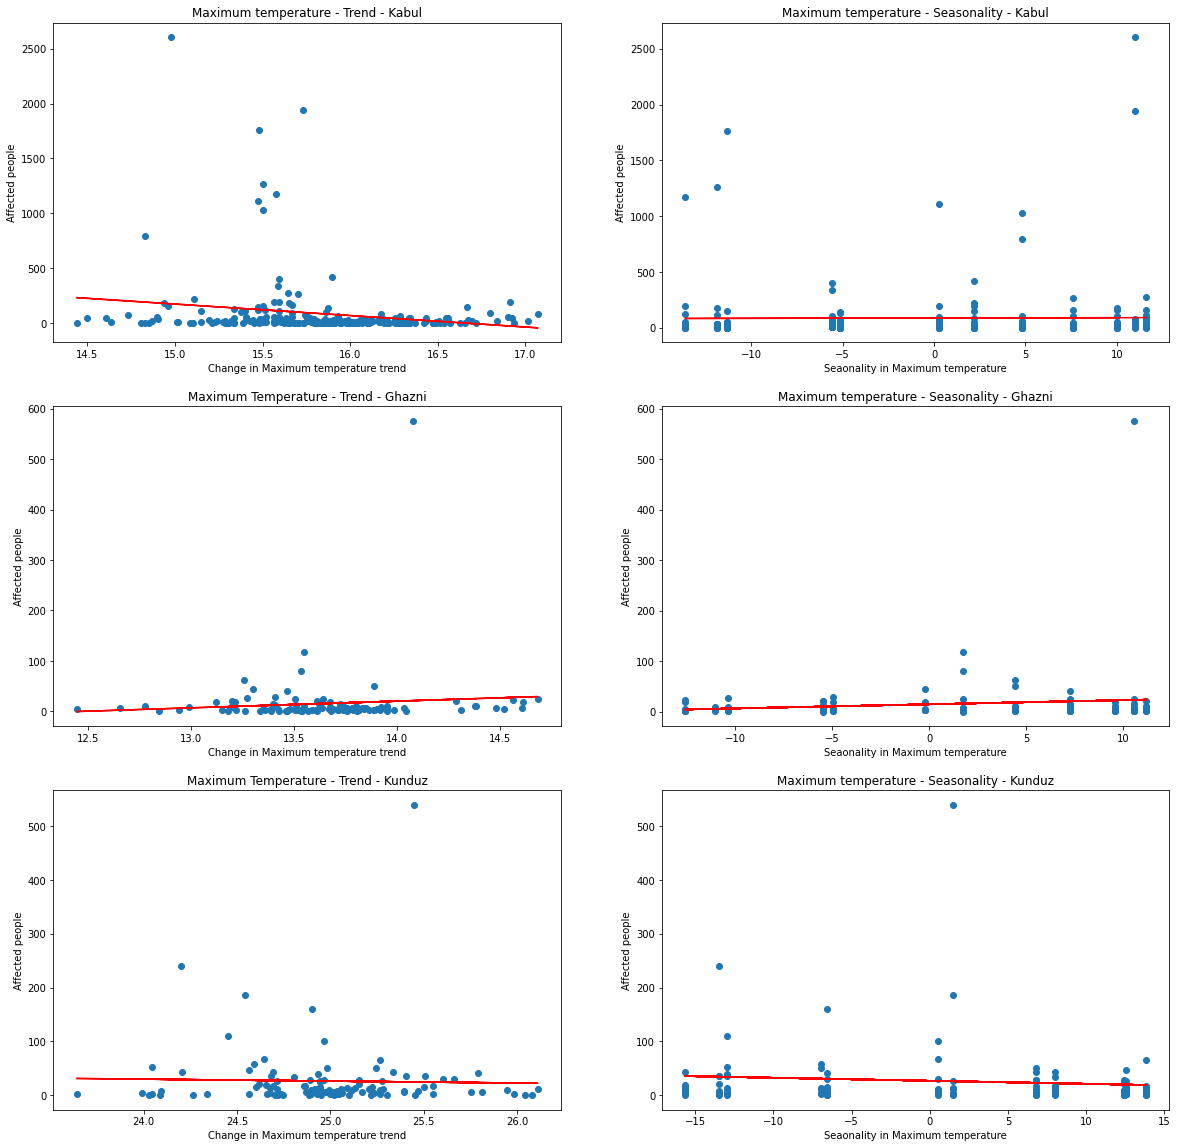

In [20]:
X = Kabul_inner_tmx.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.scatter(Kabul_inner_tmx.trend, Kabul_inner_tmx.best)
plt.plot(X, Y_pred, color='red')
plt.title('Maximum temperature - Trend - Kabul')
plt.xlabel('Change in Maximum temperature trend')
plt.ylabel('Affected people')
print("Kabul (Maximum Temp Trend)", rsquared(Kabul_inner_tmx.trend, Kabul_inner_tmx.best))
    
X = Kabul_inner_tmx.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 2)
plt.scatter(Kabul_inner_tmx.seasonal, Kabul_inner_tmx.best)
plt.plot(X, Y_pred, color='red')
plt.title('Maximum temperature - Seasonality - Kabul')
plt.xlabel('Seaonality in Maximum temperature')
plt.ylabel('Affected people')
print("Kabul (Maximum Temp Seasonality)", rsquared(Kabul_inner_tmx.seasonal, Kabul_inner_tmx.best))

X = Ghazni_inner_tmx.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 3)
plt.scatter(Ghazni_inner_tmx.trend, Ghazni_inner_tmx.best)
plt.plot(X, Y_pred, color='red')
plt.title('Maximum Temperature - Trend - Ghazni')
plt.xlabel('Change in Maximum temperature trend')
plt.ylabel('Affected people')
print("Ghazni (Maximum Temp Trend)", rsquared(Ghazni_inner_tmx.trend, Ghazni_inner_tmx.best))

X = Ghazni_inner_tmx.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 4)
plt.scatter(Ghazni_inner_tmx.seasonal, Ghazni_inner_tmx.best);
plt.plot(X, Y_pred, color='red')
plt.title('Maximum temperature - Seasonality - Ghazni')
plt.xlabel('Seaonality in Maximum temperature')
plt.ylabel('Affected people')
print("Ghazni (Maximum Temp Seasonality)", rsquared(Ghazni_inner_tmx.seasonal, Ghazni_inner_tmx.best))

X = Kunduz_inner_tmx.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 5)
plt.scatter(Kunduz_inner_tmx.trend, Kunduz_inner_tmx.best)
plt.plot(X, Y_pred, color='red')
plt.title('Maximum Temperature - Trend - Kunduz')
plt.xlabel('Change in Maximum temperature trend')
plt.ylabel('Affected people')
print("Kunduz (Maximum Temp Trend)", rsquared(Kunduz_inner_tmx.trend, Kunduz_inner_tmx.best))

X = Kunduz_inner_tmx.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner_tmx.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 6)
plt.scatter(Kunduz_inner_tmx.seasonal, Kunduz_inner_tmx.best)
plt.plot(X, Y_pred, color='red')
plt.title('Maximum temperature - Seasonality - Kunduz')
plt.xlabel('Seaonality in Maximum temperature')
plt.ylabel('Affected people')
print("Kunduz (Maximum Temp Seasonality)", rsquared(Kunduz_inner_tmx.seasonal, Kunduz_inner_tmx.best))
plt.show()

## Conclusion
#### Maximum Temperature Impact on Kabul, Ghazni and Kunduz district
Kabul (Maximum Temp Trend) (R-Sq  = 0.03318452345135957, Slope = -104.40180936684588, p-value = 0.005590892654632501)
Kabul (Maximum Temp Seasonality) (R-Sq  = 7.968425171272128e-05, Slope = 0.2906180223355958, p-value = 0.892893566068033)
Ghazni (Maximum Temp Trend) (R-Sq  = 0.008765695717804518, Slope = 13.253271322716135, p-value = 0.3351563171532874)
Ghazni (Maximum Temp Seasonality) (R-Sq  = 0.013311235886885504, Slope = 0.8174206383770538, p-value = 0.23442837401619193)
Kunduz (Maximum Temp Trend) (R-Sq  = 0.0007470341517076389, Slope = -3.5821828258405226, p-value = 0.7778541145310088)
Kunduz (Maximum Temp Seasonality) (R-Sq  = 0.0091506482213697, Slope = -0.5603650658423259, p-value = 0.32243479550335874)
#### When the affected people (due to conflict) is plotted as a function of temperature change (trend/seasonality) and fitted with a linear regression line, all districts showed a very small R-squared value demonstrating a very weak signal in the data. Not only that, all the districts either showed the weak positive slope with p-value>0.1 (insignifcant slope) or the negative slope of the fitted line. So, we reject the hypothesis that climate change due to maximum temperature has any impact on the risk of local conflict.


## Precipitation Impact in Kabul, Ghazni and Kunduz districts

In [21]:
filename1 = "cru_ts4.04.1981.1990.pre.dat.nc"
filename2 = "cru_ts4.04.1991.2000.pre.dat.nc"
filename3 = "cru_ts4.04.2001.2010.pre.dat.nc"
filename4 = "cru_ts4.04.2011.2019.pre.dat.nc"
data = Dataset(filename1)
data2 = Dataset(filename2)
data3 = Dataset(filename3)
data4 = Dataset(filename4)
print(data.variables.keys())

dict_keys(['lon', 'lat', 'time', 'pre', 'stn'])


In [22]:
pre1 = data.variables['pre'][:]
pre2 = data2.variables['pre'][:]
pre3 = data3.variables['pre'][:]
pre4 = data4.variables['pre'][:]
import numpy.ma as ma
Kabul_pre=pre1[:24,249, 498]
Kabul_pre2=pre2[:,249, 498]
Kabul_pre3=pre3[:,249, 498]
Kabul_pre4=pre4[:,249, 498]
Kabul_pre=ma.append(Kabul_pre,Kabul_pre2)
Kabul_pre=ma.append(Kabul_pre,Kabul_pre3)
Kabul_pre=ma.append(Kabul_pre,Kabul_pre4)
print (len(Kabul_pre))

Ghazni_pre=pre1[:24,247, 496]
Ghazni_pre2=pre2[:,247, 496]
Ghazni_pre3=pre3[:,247, 496]
Ghazni_pre4=pre4[:,247, 496]
Ghazni_pre=ma.append(Ghazni_pre,Ghazni_pre2)
Ghazni_pre=ma.append(Ghazni_pre,Ghazni_pre3)
Ghazni_pre=ma.append(Ghazni_pre,Ghazni_pre4)
print (len(Ghazni_pre))

Kunduz_pre=pre1[:24,253, 497]
Kunduz_pre2=pre2[:,253, 497]
Kunduz_pre3=pre3[:,253, 497]
Kunduz_pre4=pre4[:,253, 497]
Kunduz_pre=ma.append(Kunduz_pre,Kunduz_pre2)
Kunduz_pre=ma.append(Kunduz_pre,Kunduz_pre3)
Kunduz_pre=ma.append(Kunduz_pre,Kunduz_pre4)
print (len(Kunduz_pre))

372
372
372


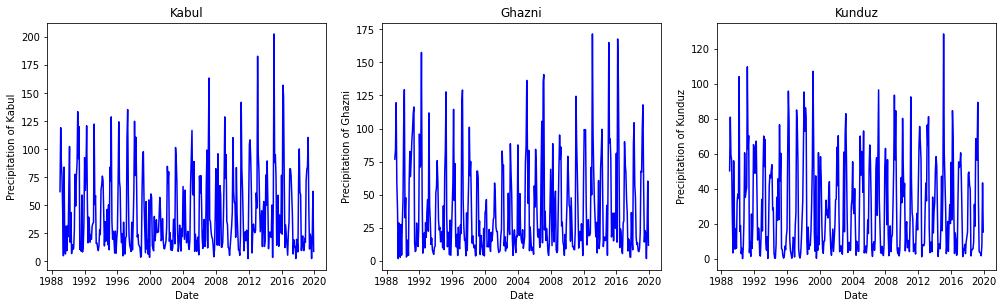

In [23]:
plt.figure(figsize=(17,10))
plt.subplot(2, 3, 1)
plt.plot(Dates, Kabul_pre, color='blue')
plt.title('Kabul')
plt.xlabel('Date')
plt.ylabel('Precipitation of Kabul')
plt.subplot(2, 3, 2)
plt.plot(Dates, Ghazni_pre, color='blue')
plt.title('Ghazni')
plt.xlabel('Date')
plt.ylabel('Precipitation of Ghazni')
plt.subplot(2, 3, 3)
plt.plot(Dates, Kunduz_pre, color='blue')
plt.title('Kunduz')
plt.xlabel('Date')
plt.ylabel('Precipitation of Kunduz')
plt.show()

C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """
C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


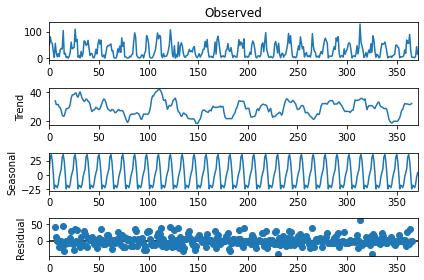

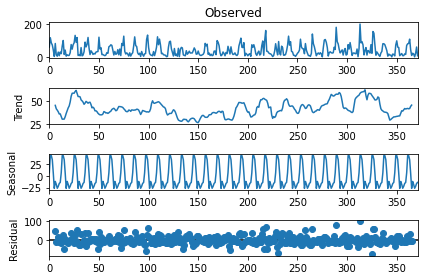

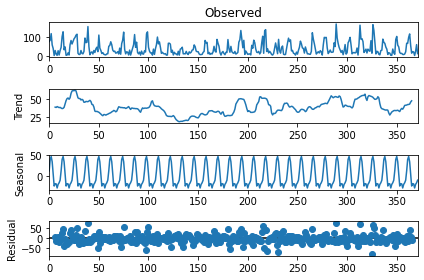

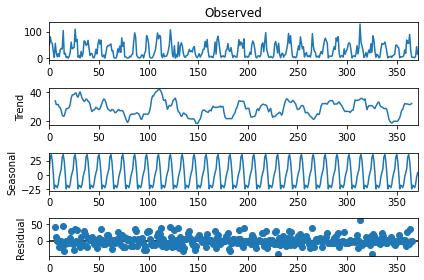

In [24]:
series1 = Kabul_pre
series2 = Ghazni_pre
series3 = Kunduz_pre
result1 = seasonal_decompose(series1, model='additive', freq=12)
result2 = seasonal_decompose(series2, model='additive', freq=12)
result3 = seasonal_decompose(series3, model='additive', freq=12)
result1.plot()
result2.plot()
result3.plot()

In [25]:
Kabul_pre=pd.DataFrame()
Kabul_pre['trend']=result1.trend
Kabul_pre['seasonal']=result1.seasonal
Kabul_pre=Kabul_pre.reset_index()
Kabul_pre['index']=Kabul_pre['index']+1
print(Kabul_pre.head)

Ghazni_pre=pd.DataFrame()
Ghazni_pre['trend']=result2.trend
Ghazni_pre['seasonal']=result2.seasonal
Ghazni_pre=Ghazni_pre.reset_index()
Ghazni_pre['index']=Ghazni_pre['index']+1
print(Ghazni_pre.head)

Kunduz_pre=pd.DataFrame()
Kunduz_pre['trend']=result3.trend
Kunduz_pre['seasonal']=result3.seasonal
Kunduz_pre=Kunduz_pre.reset_index()
Kunduz_pre['index']=Kunduz_pre['index']+1
print(Kunduz_pre.head)

Kabul_pre=Kabul_pre.dropna()
print(Kabul_pre.head)

Ghazni_pre=Ghazni_pre.dropna()
print(Ghazni_pre.head)

Kunduz_pre=Kunduz_pre.dropna()
print(Kunduz_pre.head)

<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN   6.850440
1        2    NaN  43.913912
2        3    NaN  43.850163
3        4    NaN  35.039468
4        5    NaN   5.859468
..     ...    ...        ...
367    368    NaN -18.068727
368    369    NaN -26.532061
369    370    NaN -22.300116
370    371    NaN -16.082894
371    372    NaN -13.937477

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN  12.152686
1        2    NaN  39.487686
2        3    NaN  46.646019
3        4    NaN  33.841852
4        5    NaN   5.245186
..     ...    ...        ...
367    368    NaN -19.066899
368    369    NaN -28.879121
369    370    NaN -20.167176
370    371    NaN -16.366621
371    372    NaN -10.168009

[372 rows x 3 columns]>
<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN   9.805417
1        2    NaN  31.346528
2        3    NaN  35.553333
3        4    NaN  24.565001
4        5    NaN  

In [26]:
Kabul_inner_pre = pd.merge(Kabul, Kabul_pre, on='index', how='inner')
for col in Kabul_inner_pre.columns: 
    print(col)
Kabul_inner_pre.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Ghazni_inner_pre = pd.merge(Ghazni, Ghazni_pre, on='index', how='inner')
Ghazni_inner_pre.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Kunduz_inner_pre = pd.merge(Kunduz, Kunduz_pre, on='index', how='inner')
Kunduz_inner_pre.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']

Kabul_inner_pre.head()

index
('Date', '')
('best', 'sum')
('index', '')
trend
seasonal


C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,index,Date,best,index,trend,seasonal
0,7,1989-07-01,91,7,45.654167,-11.819560
1,9,1989-09-01,20,9,40.366667,-26.532061
2,10,1989-10-01,220,10,38.570834,-22.300116
3,14,1990-02-01,31,14,30.391667,43.913912
4,15,1990-03-01,108,15,30.470834,43.850163


Kabul (Precipitation Trend) (0.008853338142370567, -3.585725337725689, 0.15492140981481406)
Kabul (Precipitation Seasonality) (0.000645965924462766, 0.29385627723981905, 0.70141397498933)
Ghazni (Precipitation Trend) (4.8341252600010716e-05, -0.0522066325700361, 0.9430670228767207)
Ghazni (Precipitation Seasonality) (0.005785337591426341, -0.1737626784717097, 0.4339855330789031)
Kunduz (Precipitation Trend) (0.013279334059502865, 1.6658883527853798, 0.23278775966756246)
Kunduz (Precipitation Seasonality) (0.0006392445874419295, 0.07242549123415032, 0.7941204528492445)


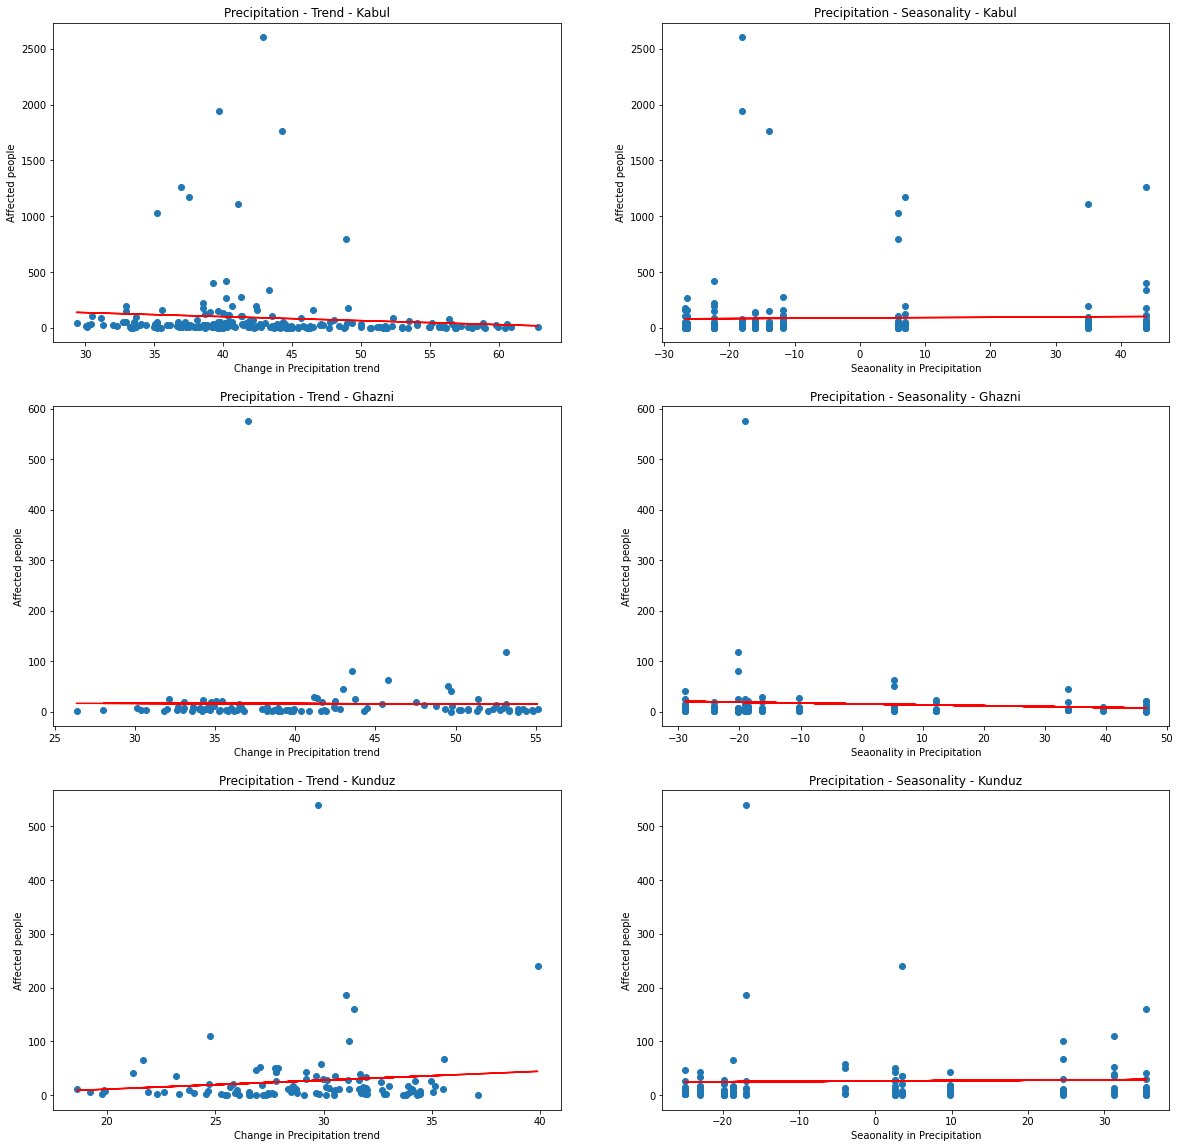

In [27]:
X = Kabul_inner_pre.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
plt.scatter(Kabul_inner_pre.trend, Kabul_inner_pre.best)
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Trend - Kabul')
plt.xlabel('Change in Precipitation trend')
plt.ylabel('Affected people')
print("Kabul (Precipitation Trend)", rsquared(Kabul_inner_pre.trend, Kabul_inner_pre.best))
    
X = Kabul_inner_pre.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kabul_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 2)
plt.scatter(Kabul_inner_pre.seasonal, Kabul_inner_pre.best)
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Seasonality - Kabul')
plt.xlabel('Seaonality in Precipitation')
plt.ylabel('Affected people')
print("Kabul (Precipitation Seasonality)", rsquared(Kabul_inner_pre.seasonal, Kabul_inner_pre.best))

X = Ghazni_inner_pre.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(3, 2, 3)
plt.scatter(Ghazni_inner_pre.trend, Ghazni_inner_pre.best)
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Trend - Ghazni')
plt.xlabel('Change in Precipitation trend')
plt.ylabel('Affected people')
print("Ghazni (Precipitation Trend)", rsquared(Ghazni_inner_pre.trend, Ghazni_inner_pre.best))

X = Ghazni_inner_pre.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 4)
plt.scatter(Ghazni_inner_pre.seasonal, Ghazni_inner_pre.best);
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Seasonality - Ghazni')
plt.xlabel('Seaonality in Precipitation')
plt.ylabel('Affected people')
print("Ghazni (Precipitation Seasonality)", rsquared(Ghazni_inner_pre.seasonal, Ghazni_inner_pre.best))

X = Kunduz_inner_pre.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 5)
plt.scatter(Kunduz_inner_pre.trend, Kunduz_inner_pre.best)
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Trend - Kunduz')
plt.xlabel('Change in Precipitation trend')
plt.ylabel('Affected people')
print("Kunduz (Precipitation Trend)", rsquared(Kunduz_inner_pre.trend, Kunduz_inner_pre.best))

X = Kunduz_inner_pre.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Kunduz_inner_pre.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(3, 2, 6)
plt.scatter(Kunduz_inner_pre.seasonal, Kunduz_inner_pre.best)
plt.plot(X, Y_pred, color='red')
plt.title('Precipitation - Seasonality - Kunduz')
plt.xlabel('Seaonality in Precipitation')
plt.ylabel('Affected people')
print("Kunduz (Precipitation Seasonality)", rsquared(Kunduz_inner_pre.seasonal, Kunduz_inner_pre.best))
plt.show()

## Conclusion
#### Precipitation Impact on Kabul, Ghazni and Kunduz district
No Outlier
Kabul (Precipitation Trend) (R-Sq  = 0.008853338142370567, Slope = -3.585725337725689, p-value = 0.15492140981481406)
Kabul (Precipitation Seasonality) (R-Sq  = 0.000645965924462766, Slope = 0.29385627723981905, p-value = 0.70141397498933)
Ghazni (Precipitation Trend) (R-Sq  = 4.8341252600010716e-05, Slope = -0.0522066325700361, p-value = 0.9430670228767207)
Ghazni (Precipitation Seasonality) (R-Sq  = 0.005785337591426341, Slope = -0.1737626784717097, p-value = 0.4339855330789031)
Kunduz (Precipitation Trend) (R-Sq  = 0.013279334059502865, Slope = 1.6658883527853798, p-value = 0.23278775966756246)
Kunduz (Precipitation Seasonality) (R-Sq  = 0.0006392445874419295, Slope = 0.07242549123415032, p-value = 0.7941204528492445)

Remove OUTLIER with Z>5
Kabul (Precipitation Trend) (0.01968047475772683, -3.075330077631833, 0.03464979946160775)
Kabul (Precipitation Seasonality) (0.019672117750763527, 0.9344696422932899, 0.03468864110202962)
Ghazni (Precipitation Trend) (0.02692009521640855, 0.3550379055583234, 0.09127326624584504)
Ghazni (Precipitation Seasonality) (0.0030794559713400046, -0.03654792891934645, 0.5702264577428491)
Kunduz (Precipitation Trend) (0.03078559481568644, 1.4857476812793209, 0.06932197381447616)
Kunduz (Precipitation Seasonality) (0.021271967407190825, 0.24536528215792935, 0.13203185290719419)

#### When the affected people (due to conflict) is plotted as a function of precipitation change (trend/seasonality) and fitted with a linear regression line, all districts showed a very small R-squared value demonstrating a very weak signal in the data. Not only that, most of the districts showed the negative slope of the fitted line. So, we reject the hypothesis that climate change due to precipitation increases the risk of local conflict.
#### However, only Ghazni (trend in precipitation vs. affected people) demonstrated a strong positive slope of the fitted line, since p-value=0.091. Since p-value < 0.1, it means that the positive slope is statistically significant. This implies that although the R-squrared=0.027 (which is very small)demonstrating a weak signal, it suggest that the precipitation trend change may have a bearing on increasing the conflict in Ghazni district.

#### Since Ghazni district is the only district which proved that there can be a positive correlation between climate change (due to minimum temperature and precipitation) and local conflict, I chose to analyze the maximum temperature impact on local conflict only in Ghazni district.
## Average Temperature Impact in Ghazni district

In [29]:
filename1 = "cru_ts4.04.1981.1990.tmp.dat.nc"
filename2 = "cru_ts4.04.1991.2000.tmp.dat.nc"
filename3 = "cru_ts4.04.2001.2010.tmp.dat.nc"
filename4 = "cru_ts4.04.2011.2019.tmp.dat.nc"
data = Dataset(filename1)
data2 = Dataset(filename2)
data3 = Dataset(filename3)
data4 = Dataset(filename4)
print(data.variables.keys())

dict_keys(['lon', 'lat', 'time', 'tmp', 'stn'])


In [30]:
tmp1 = data.variables['tmp'][:]
tmp2 = data2.variables['tmp'][:]
tmp3 = data3.variables['tmp'][:]
tmp4 = data4.variables['tmp'][:]

Ghazni_tmp=tmp1[:24,247, 496]
Ghazni_tmp2=tmp2[:,247, 496]
Ghazni_tmp3=tmp3[:,247, 496]
Ghazni_tmp4=tmp4[:,247, 496]
Ghazni_tmp=ma.append(Ghazni_tmp,Ghazni_tmp2)
Ghazni_tmp=ma.append(Ghazni_tmp,Ghazni_tmp3)
Ghazni_tmp=ma.append(Ghazni_tmp,Ghazni_tmp4)
print (len(Ghazni_tmp))


372


C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


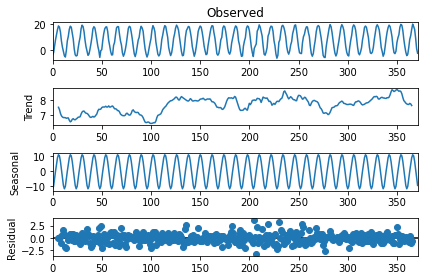

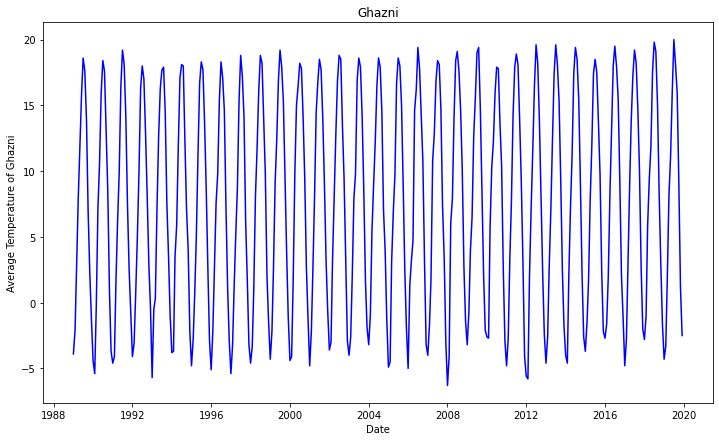

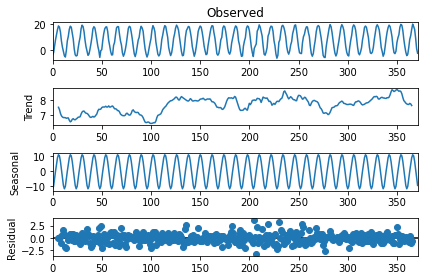

In [34]:
plt.figure(figsize=(12,7))
plt.plot(Dates, Ghazni_tmp, color='blue')
plt.title('Ghazni')
plt.xlabel('Date')
plt.ylabel('Average Temperature of Ghazni')

series2 = Ghazni_tmp
result2 = seasonal_decompose(series2, model='additive', freq=12)
result2.plot()

In [35]:
Ghazni_tmp=pd.DataFrame()
Ghazni_tmp['trend']=result2.trend
Ghazni_tmp['seasonal']=result2.seasonal
Ghazni_tmp=Ghazni_tmp.reset_index()
Ghazni_tmp['index']=Ghazni_tmp['index']+1
print(Ghazni_tmp.head)

Ghazni_tmp=Ghazni_tmp.dropna()
Ghazni_tmp.head()



<bound method NDFrame.head of      index  trend   seasonal
0        1    NaN -11.991875
1        2    NaN -10.374514
2        3    NaN  -5.154653
3        4    NaN  -0.063819
4        5    NaN   4.318125
..     ...    ...        ...
367    368    NaN  10.291736
368    369    NaN   6.548125
369    370    NaN   1.025764
370    371    NaN  -5.060347
371    372    NaN  -9.696320

[372 rows x 3 columns]>


,index,trend,seasonal
6,7,7.520833,11.106181
7,8,7.362500,10.291736
8,9,7.091667,6.548125
9,10,6.925000,1.025764
10,11,6.841667,-5.060347


In [36]:
Ghazni_inner_tmp = pd.merge(Ghazni, Ghazni_tmp, on='index', how='inner')
Ghazni_inner_tmp.columns = ['index', 'Date', 'best', 'index', 'trend', 'seasonal']
Ghazni_inner_tmp.head()

C:\Users\Samir Prasun\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,index,Date,best,index,trend,seasonal
0,179,2003-11-01,1,179,8.108333,-5.060347
1,200,2005-08-01,1,200,7.558333,10.291736
2,207,2006-03-01,5,207,8.000000,-5.154653
3,209,2006-05-01,2,209,8.150000,4.318125
4,210,2006-06-01,2,210,8.133334,9.051597


Ghazni (Average Temp Trend) (0.02290709757947702, 25.73652897967637, 0.11791051678705096)
Ghazni (Average Temp Seasonality) (0.013389171793419027, 0.8556732166909139, 0.23305429673566191)


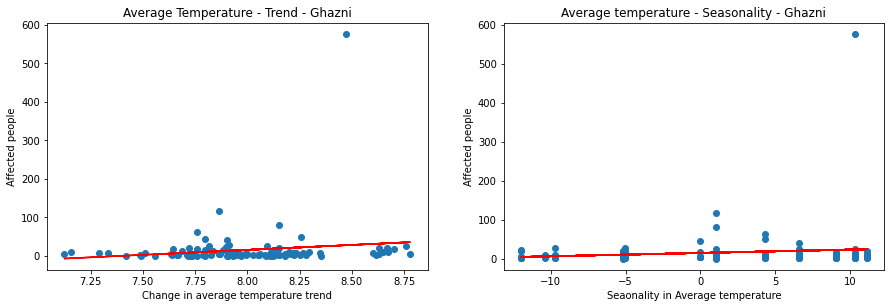

In [40]:
plt.figure(figsize=(15,10))
X = Ghazni_inner_tmp.trend.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_tmp.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X)  
plt.subplot(2, 2, 1)
plt.scatter(Ghazni_inner_tmp.trend, Ghazni_inner_tmp.best)
plt.plot(X, Y_pred, color='red')
plt.title('Average Temperature - Trend - Ghazni')
plt.xlabel('Change in average temperature trend')
plt.ylabel('Affected people')
print("Ghazni (Average Temp Trend)", rsquared(Ghazni_inner_tmp.trend, Ghazni_inner_tmp.best))

X = Ghazni_inner_tmp.seasonal.values.reshape(-1, 1)  # values converts it into a numpy array
Y = Ghazni_inner_tmp.best.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lgr = LinearRegression()  # create object for the class
lgr.fit(X, Y)  # perform linear regression
Y_pred = lgr.predict(X) 
plt.subplot(2, 2, 2)
plt.scatter(Ghazni_inner_tmp.seasonal, Ghazni_inner_tmp.best);
plt.plot(X, Y_pred, color='red')
plt.title('Average temperature - Seasonality - Ghazni')
plt.xlabel('Seaonality in Average temperature')
plt.ylabel('Affected people')
print("Ghazni (Average Temp Seasonality)", rsquared(Ghazni_inner_tmp.seasonal, Ghazni_inner_tmp.best))


## Conclusion
#### Average Temperature Impact on Kabul, Ghazni and Kunduz district
No Outlier
Kabul (Precipitation Trend) (R-Sq  = 0.008853338142370567, Slope = -3.585725337725689, p-value = 0.15492140981481406)
Kabul (Precipitation Seasonality) (R-Sq  = 0.000645965924462766, Slope = 0.29385627723981905, p-value = 0.70141397498933)
Ghazni (Precipitation Trend) (R-Sq  = 4.8341252600010716e-05, Slope = -0.0522066325700361, p-value = 0.9430670228767207)
Ghazni (Precipitation Seasonality) (R-Sq  = 0.005785337591426341, Slope = -0.1737626784717097, p-value = 0.4339855330789031)
Kunduz (Precipitation Trend) (R-Sq  = 0.013279334059502865, Slope = 1.6658883527853798, p-value = 0.23278775966756246)
Kunduz (Precipitation Seasonality) (R-Sq  = 0.0006392445874419295, Slope = 0.07242549123415032, p-value = 0.7941204528492445)

Remove OUTLIER with Z>5
Kabul (Precipitation Trend) (0.01968047475772683, -3.075330077631833, 0.03464979946160775)
Kabul (Precipitation Seasonality) (0.019672117750763527, 0.9344696422932899, 0.03468864110202962)
Ghazni (Precipitation Trend) (0.02692009521640855, 0.3550379055583234, 0.09127326624584504)
Ghazni (Precipitation Seasonality) (0.0030794559713400046, -0.03654792891934645, 0.5702264577428491)
Kunduz (Precipitation Trend) (0.03078559481568644, 1.4857476812793209, 0.06932197381447616)
Kunduz (Precipitation Seasonality) (0.021271967407190825, 0.24536528215792935, 0.13203185290719419)

#### When the affected people (due to conflict) is plotted as a function of precipitation change (trend/seasonality) and fitted with a linear regression line, Ghazni districts showed a very small R-squared value ( a weak signal) although a strong positive slope with p-value=0.11. Since p-value = 0.1, it means that the positive slope is statistically significant, which suggest that the precipitation trend change may have a bearing on increasing the conflict in Ghazni district.

## Summary
#### What are your statistical metrics to reject/accept your hypothesis?
#### Answer: I chose three metrics to reject/accept my hypothesis: R-squared, slope of the regression line, p-value. There are two ways to tackle the problem:
1) Since R-squared value is too low for all the linear regression models (all districts), it can be easily inferred that climate change has no impact on local conflict in any of the districts.
2) Since the assumption of the problem is "There is no direct and linear relationship between climate change and violent conflict, but under certain circumstances climate-related change can influence factors that lead to local conflicts" as stated in the problem, I assumed that even a weak signal in the form of low R-squared value would still suggest a possible climate change influence on the local conflict. So, while evaluating the model, I disregarded the impact of R-squared value. I chose the positive slope and p-value as the factor to determine any positive correlation between climate change and conflict. Since p-value suggest the strength of the slope, I considered p-value<0.1 (and positive slope) as my metrics for accepting the hypothesis.

#### What is your conclusion on the correlation/association between conflict and climate variables in each of districts given your statistical metrics?
#### Answer: Clearly, given my assumption 2, I inferred that there may be a possible correlation between climate change and conflict in Ghazni district as the district demonstrated a positive slope with p-value<=0.1 when using minimum temperature, average temperature and precipitation trend as the predictor variable. Other districts (including Kabul and Kunduz) either showed the negative slope or the weak positive slope with p-value>0.1, where the above hypotheis would fail to work.